<a href="https://colab.research.google.com/github/RobbertVKH/UvA_Bigdata_VanKortenhof/blob/master/Big_Data_Class_imbalance_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import  confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

pip install ipython-autotime
%load_ext autotime


SyntaxError: ignored

In [0]:
fiftyto1_x, fiftyto1_y = make_classification(n_samples = 100000, n_features=2, n_informative=2,n_redundant=0,n_repeated=0, n_classes=2, n_clusters_per_class=1, weights=[0.98,0.02], hypercube=True)

time: 67.3 ms


In [0]:
hundredto1_x, hundredto1_y = make_classification(n_samples = 100000, n_features=2, n_informative=2,n_redundant=0,n_repeated=0, n_classes=2, n_clusters_per_class=1, weights=[0.99,0.01], hypercube=True)

time: 61 ms


In [0]:
thousandto1_x, thousandto1_y = make_classification(n_samples = 100000, n_features=2, n_informative=2,n_redundant=0,n_repeated=0, n_classes=2, n_clusters_per_class=1, weights=[0.999,0.001], hypercube=True)

time: 43.3 ms


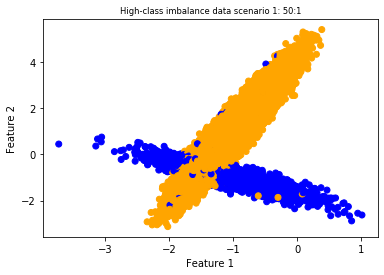

time: 4.17 s


In [0]:
plt.subplot()
colors1 = ['orange','blue']
plt.title("High-class imbalance data scenario 1: 50:1", fontsize='small')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(fiftyto1_x[:,0], fiftyto1_x[:,1], marker = 'o', c = fiftyto1_y, cmap=matplotlib.colors.ListedColormap(colors1))


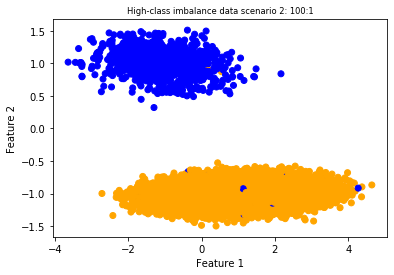

time: 4.13 s


In [0]:
plt.subplot()
colors1 = ['orange','blue']
plt.title("High-class imbalance data scenario 2: 100:1", fontsize='small')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(hundredto1_x[:,0], hundredto1_x[:,1], marker = 'o', c = hundredto1_y, cmap=matplotlib.colors.ListedColormap(colors1))


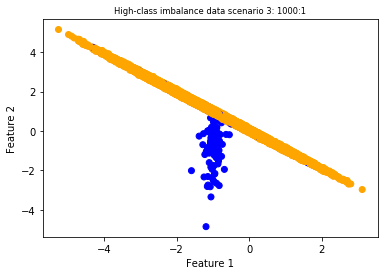

time: 4.03 s


In [0]:
plt.subplot()
colors1 = ['orange','blue']
plt.title("High-class imbalance data scenario 3: 1000:1", fontsize='small')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(thousandto1_x[:,0], thousandto1_x[:,1], marker = 'o', c = thousandto1_y, cmap=matplotlib.colors.ListedColormap(colors1))


In [0]:
# Splitting the data 
X_50_train, X_50_test, Y_50_train, Y_50_test = train_test_split(fiftyto1_x, fiftyto1_y, test_size = 0.2)
X_100_train, X_100_test, Y_100_train, Y_100_test = train_test_split(hundredto1_x, hundredto1_y, test_size = 0.2)
X_1000_train, X_1000_test, Y_1000_train, Y_1000_test = train_test_split(thousandto1_x, thousandto1_y, test_size = 0.2)

time: 41.7 ms


In [0]:
# Creating simple 'bottomline' SVM classifiers
svm_50 = svm.SVC(kernel = 'linear')
svm_100 = svm.SVC(kernel= 'linear')
svm_1000 = svm.SVC(kernel = 'linear')

time: 2.41 ms


In [0]:
# Fitting SVM to the training data
svm_50.fit(X_50_train, Y_50_train)
svm_100.fit(X_100_train, Y_100_train)
svm_1000.fit(X_1000_train, Y_1000_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

time: 1min 1s


In [0]:
# Predicting SVMs based on testing data
Y_50_predict = svm_50.predict(X_50_test)
Y_100_predict = svm_100.predict(X_100_test)
Y_1000_predict = svm_1000.predict(X_1000_test)

time: 822 ms


In [0]:
# Comparing predict with test 
print("Balanced accuracy of 50:1 model is", metrics.balanced_accuracy_score(Y_50_test, Y_50_predict))
print("F-score of 50:1 model is", metrics.f1_score(Y_50_test, Y_50_predict))

print("Balanced accuracy of 100:1 model is", metrics.balanced_accuracy_score(Y_100_test, Y_100_predict))
print("F-score of 100:1 model is", metrics.f1_score(Y_100_test, Y_100_predict))

print("Balanced accuracy of 1000:1 model is", metrics.balanced_accuracy_score(Y_1000_test, Y_1000_predict))
print("F-score of 1000:1 model is", metrics.f1_score(Y_1000_test, Y_1000_predict))

Balanced accuracy of 50:1 model is 0.6590863291160287
F-score of 50:1 model is 0.48136645962732927
Balanced accuracy of 100:1 model is 0.8493788819875776
F-score of 100:1 model is 0.8226691042047533
Balanced accuracy of 1000:1 model is 0.5512820512820513
F-score of 1000:1 model is 0.18604651162790695
time: 93 ms


In [0]:
# Creating cost-sensitive SVM classifiers
cs_svm_50 = svm.SVC(kernel = 'linear', class_weight = 'balanced', C = 5)
cs_svm_100 = svm.SVC(kernel= 'linear', class_weight = 'balanced', C = 5)
cs_svm_1000 = svm.SVC(kernel = 'linear', class_weight = 'balanced', C = 5)

time: 2.43 ms


In [0]:
# Fitting cost-sensitive SVM classifiers
cs_svm_50.fit(X_50_train, Y_50_train)
cs_svm_100.fit(X_100_train, Y_100_train)
cs_svm_1000.fit(X_1000_train, Y_1000_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

time: 8min 42s


In [0]:
# Predicting cost-sensitive SVM classifiers 
cs_Y_50_predict = cs_svm_50.predict(X_50_test)
cs_Y_100_predict = cs_svm_100.predict(X_100_test)
cs_Y_1000_predict = cs_svm_1000.predict(X_1000_test)

time: 21.5 s


In [0]:
# Comparing cs predict with test 
print("Balanced accuracy of 50:1 cost sensitive model is", metrics.balanced_accuracy_score(Y_50_test, cs_Y_50_predict))
print("F-score of 50:1 cost sensitive model is", metrics.f1_score(Y_50_test, cs_Y_50_predict))
print("Balanced accuracy of 100:1 cost sensitive model is", metrics.balanced_accuracy_score(Y_100_test, cs_Y_100_predict))
print("F-score of 100:1 cost sensitive model is", metrics.f1_score(Y_100_test, cs_Y_100_predict))
print("Balanced accuracy of 1000:1 cost sensitive model is", metrics.balanced_accuracy_score(Y_1000_test, cs_Y_1000_predict))
print("F-score of 1000:1 cost sensitive model is", metrics.f1_score(Y_1000_test, cs_Y_1000_predict))

Balanced accuracy of 50:1 cost sensitive model is 0.8166260138689196
F-score of 50:1 cost sensitive model is 0.1670077773229636
Balanced accuracy of 100:1 cost sensitive model is 0.8493788819875776
F-score of 100:1 cost sensitive model is 0.8226691042047533
Balanced accuracy of 1000:1 cost sensitive model is 0.5598290598290598
F-score of 1000:1 cost sensitive model is 0.21374045801526717
time: 87.7 ms


In [0]:
# Applying BorderlineSMOTE to datasets

oversample = BorderlineSMOTE()
fiftyto_1xSMOTE, fiftyto_1ySMOTE = oversample.fit_resample(fiftyto1_x, fiftyto1_y)
hundredto_1xSMOTE, hundredto_1ySMOTE = oversample.fit_resample(hundredto1_x, hundredto1_y)
thousandto_1xSMOTE, thousandto_1ySMOTE = oversample.fit_resample(thousandto1_x, thousandto1_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

time: 1.61 s


In [0]:
# Splitting the SMOTE data 
X_50_train_smote, X_50_test_smote, Y_50_train_smote, Y_50_test_smote = train_test_split(fiftyto_1xSMOTE, fiftyto_1ySMOTE, test_size = 0.2)
X_100_train_smote, X_100_test_smote, Y_100_train_smote, Y_100_test_smote = train_test_split(hundredto_1xSMOTE, hundredto_1ySMOTE, test_size = 0.2)
X_1000_train_smote, X_1000_test_smote, Y_1000_train_smote, Y_1000_test_smote = train_test_split(thousandto_1xSMOTE, thousandto_1ySMOTE, test_size = 0.2)

time: 65.5 ms


In [0]:
#Creating simple SVMs based on SMOTE data
svm_50_smote = svm.SVC(kernel = 'linear')
svm_100_smote = svm.SVC(kernel= 'linear')
svm_1000_smote = svm.SVC(kernel = 'linear')

time: 1.87 ms


In [0]:
# Fitting SVM to the smote training data
svm_50_smote.fit(X_50_train_smote, Y_50_train_smote)
svm_100_smote.fit(X_100_train_smote, Y_100_train_smote)
svm_1000_smote.fit(X_1000_train_smote, Y_1000_train_smote)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

time: 18min 47s


In [0]:
# Predicting SVM classifiers based on smote data
Y_50_smote_predict = svm_50_smote.predict(X_50_test_smote)
Y_100_smote_predict = svm_100_smote.predict(X_100_test_smote)
Y_1000_smote_predict = svm_1000_smote.predict(X_1000_test_smote)

time: 1min 39s


In [0]:
# Comparing smote predict with test 
print("Balanced accuracy of 50:1 SMOTE model is", metrics.balanced_accuracy_score(Y_50_test_smote, Y_50_smote_predict))
print("F-score of 50:1 SMOTE model is", metrics.f1_score(Y_50_test_smote, Y_50_smote_predict))
print("Balanced accuracy of 100:1 SMOTE model is", metrics.balanced_accuracy_score(Y_100_test_smote, Y_100_smote_predict))
print("F-score of 100:1 SMOTE model is", metrics.f1_score(Y_100_test_smote, Y_100_smote_predict))
print("Balanced accuracy of 1000:1 SMOTE model is", metrics.balanced_accuracy_score(Y_1000_test_smote, Y_1000_smote_predict))
print("F-score of 1000:1 SMOTE model is", metrics.f1_score(Y_1000_test_smote, Y_1000_smote_predict))

Balanced accuracy of 50:1 SMOTE model is 0.9053130422058437
F-score of 50:1 SMOTE model is 0.9112218131061537
Balanced accuracy of 100:1 SMOTE model is 0.5050898355983102
F-score of 100:1 SMOTE model is 0.020154179472968207
Balanced accuracy of 1000:1 SMOTE model is 0.68269747194234
F-score of 1000:1 SMOTE model is 0.6580271630323035
time: 174 ms


Text(0.5, 0.98, '50:1 imbalance scenario before and after borderline-SMOTE')

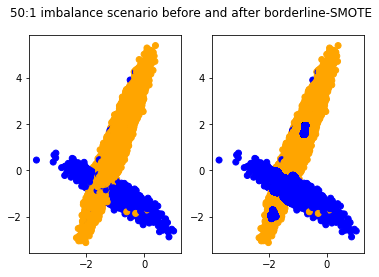

time: 11.4 s


In [0]:
fig, (ax1, ax2) = plt.subplots(1,2)
colors1 = ['orange','blue']
ax1.scatter(fiftyto1_x[:,0], fiftyto1_x[:,1], marker = 'o', c = fiftyto1_y, cmap=matplotlib.colors.ListedColormap(colors1))
ax2.scatter(fiftyto_1xSMOTE[:,0], fiftyto_1xSMOTE[:,1], marker = 'o', c = fiftyto_1ySMOTE, cmap=matplotlib.colors.ListedColormap(colors1))
plt.suptitle('50:1 imbalance scenario before and after borderline-SMOTE')



Text(0.5, 0.98, '100:1 imbalance scenario before and after borderline-SMOTE')

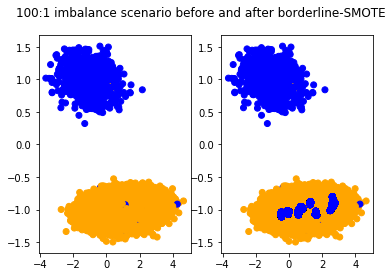

time: 11.5 s


In [0]:
fig, (ax1, ax2) = plt.subplots(1,2)
colors1 = ['orange','blue']
ax1.scatter(hundredto1_x[:,0], hundredto1_x[:,1], marker = 'o', c = hundredto1_y, cmap=matplotlib.colors.ListedColormap(colors1))
ax2.scatter(hundredto_1xSMOTE[:,0], hundredto_1xSMOTE[:,1], marker = 'o', c = hundredto_1ySMOTE, cmap=matplotlib.colors.ListedColormap(colors1))
plt.suptitle('100:1 imbalance scenario before and after borderline-SMOTE')



Text(0.5, 0.98, '1000:1 imbalance scenario before and after borderline-SMOTE')

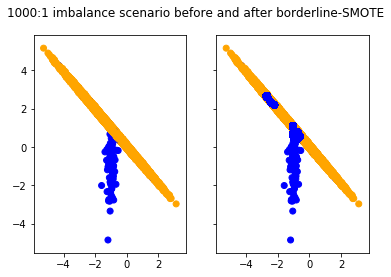

time: 11.6 s


In [0]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex = True, sharey = True)
colors1 = ['orange','blue']
ax1.xlabel = 'Feature 1'
ax1.ylabel = 'Feature 2'
ax1.scatter(thousandto1_x[:,0], thousandto1_x[:,1], marker = 'o', c = thousandto1_y, cmap=matplotlib.colors.ListedColormap(colors1))
ax2.scatter(thousandto_1xSMOTE[:,0], thousandto_1xSMOTE[:,1], marker = 'o', c = thousandto_1ySMOTE, cmap=matplotlib.colors.ListedColormap(colors1))
plt.suptitle('1000:1 imbalance scenario before and after borderline-SMOTE')

